In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [7]:
sales_data = pd.read_csv('/content/Train (5).csv')

In [8]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
sales_data.shape

(8523, 12)

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
sales_data['Item_Weight'].mean()

12.857645184135976

In [13]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(),inplace = True)

In [14]:
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
mode_Outlet_Size = sales_data.pivot_table(values = 'Outlet_Size' , columns = 'Outlet_Type' , aggfunc={lambda x:x.mode()[0]})

In [16]:
print(mode_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
<lambda>            Small             Small            Medium   

Outlet_Type Supermarket Type3  
<lambda>               Medium  


In [17]:
missing_values = sales_data['Outlet_Size'].isnull()

In [18]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
sales_data.loc[missing_values , 'Outlet_Size'] = sales_data.loc[missing_values, 'Outlet_Type'].apply(lambda x:mode_Outlet_Size[x])

In [20]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
sns.set()

<ipython-input-23-92ea0dea4f03>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


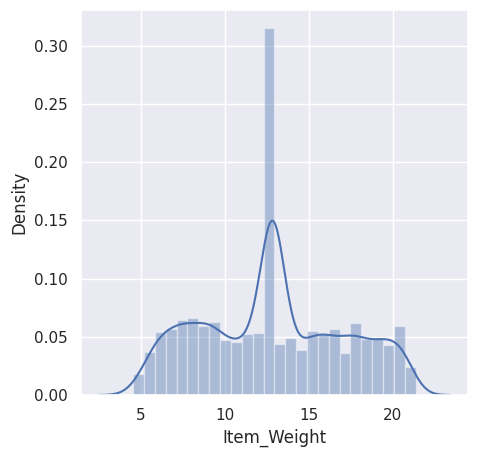

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Weight'])
plt.show()

<ipython-input-24-af972c706ab0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


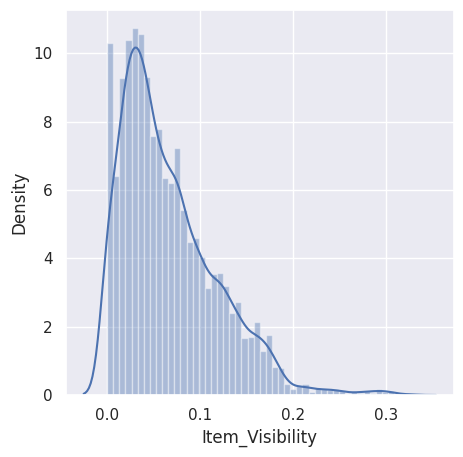

In [24]:
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Visibility'])
plt.show()

<ipython-input-25-d81a44de7c9a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


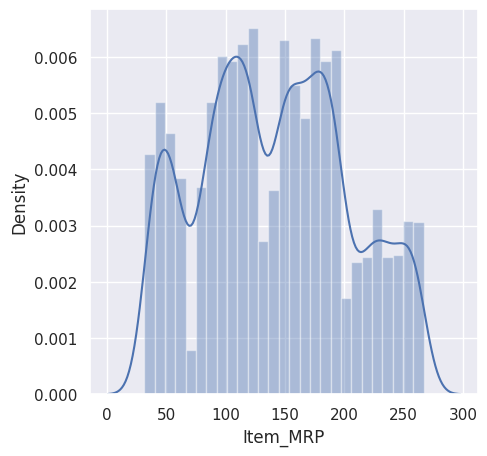

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_MRP'])
plt.show()

<ipython-input-26-4c772ff474f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


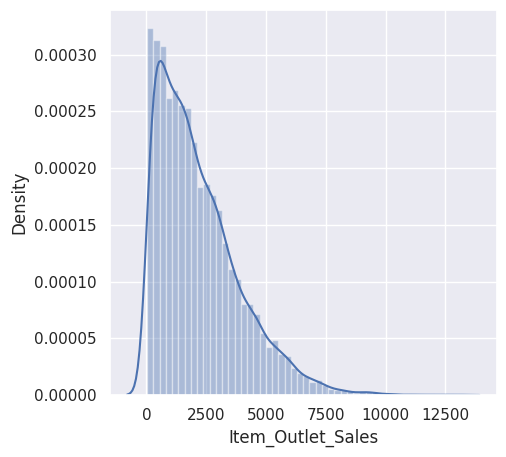

In [26]:
plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()

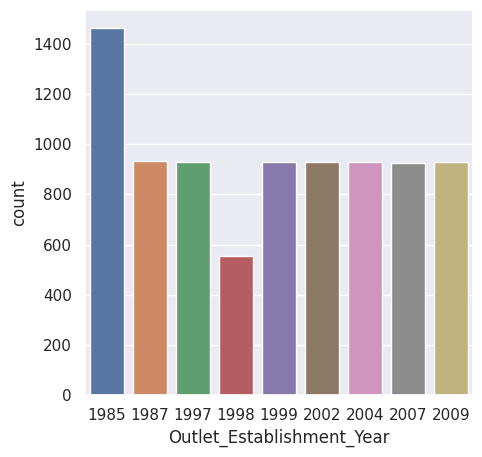

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year', data = sales_data)
plt.show()

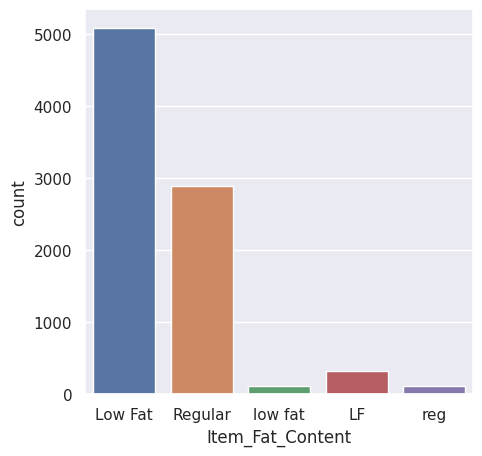

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data = sales_data)
plt.show()

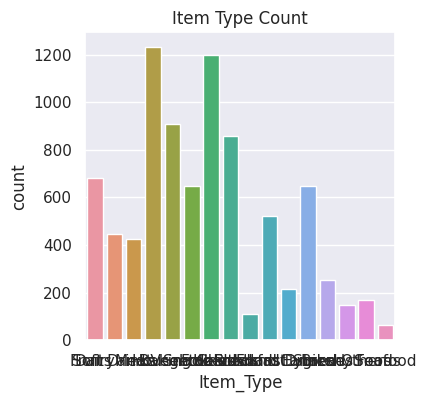

In [29]:
plt.figure(figsize=(4,4))
plt.title('Item Type Count')
sns.countplot(x='Item_Type', data = sales_data)
plt.show()

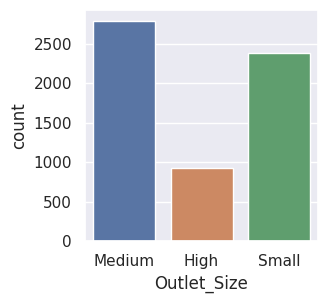

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Size', data = sales_data)
plt.show()

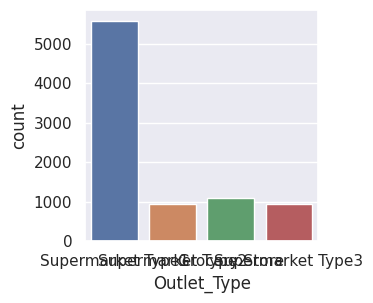

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Type', data = sales_data)
plt.show()

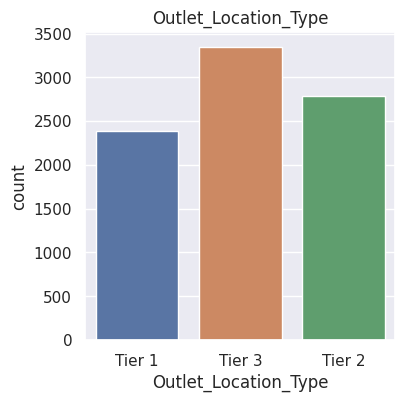

In [32]:
plt.figure(figsize=(4,4))
plt.title('Outlet_Location_Type')
sns.countplot(x='Outlet_Location_Type', data = sales_data)
plt.show()

In [33]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
sales_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [35]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [49]:
encoder = OneHotEncoder(sparse=False)

In [51]:
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [53]:
encoded_data = pd.DataFrame(encoder.fit_transform(sales_data[categorical_columns]))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
encoded_data

,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [117]:
numerical_columns = sales_data.drop(columns=categorical_columns)
numerical_columns =pd.DataFrame(numerical_columns)
numerical_columns = numerical_columns.drop(columns='Item_Outlet_Sales', axis = 1)
print(numerical_columns)
processed_data = pd.concat([numerical_columns, encoded_data], axis=1)
print(processed_data)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0           9.300         0.016047  249.8092                       1999
1           5.920         0.019278   48.2692                       2009
2          17.500         0.016760  141.6180                       1999
3          19.200         0.000000  182.0950                       1998
4           8.930         0.000000   53.8614                       1987
...           ...              ...       ...                        ...
8518        6.865         0.056783  214.5218                       1987
8519        8.380         0.046982  108.1570                       2002
8520       10.600         0.035186   85.1224                       2004
8521        7.210         0.145221  103.1332                       2009
8522       14.800         0.044878   75.4670                       1997

[8523 rows x 4 columns]
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year    0  \
0           9.300         0.016

In [119]:
X = processed_data
Y = sales_data['Item_Outlet_Sales']

In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [121]:
print(X.shape,X_test.shape,X_test.shape)

(8523, 1586) (1705, 1586) (1705, 1586)


In [122]:
model =XGBRegressor()

In [123]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [124]:
train_prediction = model.predict(X_train)

In [125]:
r2_score = metrics.r2_score(Y_train,train_prediction)
print(r2_score)

0.6110302128506342


In [126]:
test_prediction = model.predict(X_test)

In [127]:
r2_score = metrics.r2_score(Y_test,test_prediction)
print(r2_score)

0.3953586483108956


In [128]:
sales_test  = pd.read_csv('/content/Test (2).csv')

In [129]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [130]:
sales_test.shape

(5681, 11)

In [131]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [132]:
sales_test['Item_Weight'].fillna(sales_test['Item_Weight'].mean(),inplace = True)

In [133]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [134]:
mode_Outlet_Size = sales_test.pivot_table(values = 'Outlet_Size' , columns = 'Outlet_Type' , aggfunc={lambda x:x.mode()[0]})
sales_test.loc[missing_values , 'Outlet_Size'] = sales_test.loc[missing_values, 'Outlet_Type'].apply(lambda x:mode_Outlet_Size[x])

In [135]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2790
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [136]:
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

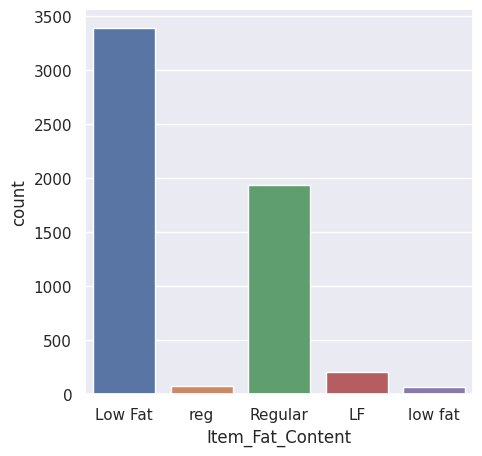

In [137]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data = sales_test)
plt.show()

In [138]:
sales_test.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [139]:
encoded_data = pd.DataFrame(encoder.fit_transform(sales_test[categorical_columns]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
numerical_columns = sales_test.drop(columns=categorical_columns)
print(numerical_columns)
processed_test_data = pd.concat([numerical_columns, encoded_data], axis=1)
print(processed_test_data)


      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0       20.750000         0.007565  107.8622                       1999
1        8.300000         0.038428   87.3198                       2007
2       14.600000         0.099575  241.7538                       1998
3        7.315000         0.015388  155.0340                       2007
4       12.695633         0.118599  234.2300                       1985
...           ...              ...       ...                        ...
5676    10.500000         0.013496  141.3154                       1997
5677     7.600000         0.142991  169.1448                       2009
5678    10.000000         0.073529  118.7440                       2002
5679    15.300000         0.000000  214.6218                       2007
5680     9.500000         0.104720   79.7960                       2002

[5681 rows x 4 columns]
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year    0  \
0       20.750000         0.007

In [142]:
predicted_sales=model.predict(processed_test_data)

In [144]:
predicted_sales_price = pd.DataFrame(predicted_sales)

In [145]:
print(predicted_sales_price)

                0
0     1431.413574
1     1399.937134
2      661.933167
3     2534.889648
4     4127.711426
...           ...
5676  2273.274170
5677  2456.138672
5678  1821.200073
5679  3468.293945
5680  1398.585815

[5681 rows x 1 columns]
